<a href="https://colab.research.google.com/github/MarcusVieira01/Ebac_Python_TSE/blob/main/Ebac_Python_TSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula 1: Contexto e objetivo**





## **Objetivo**:
Usar o Python para analisar o arquivo RDV e replicar os dados obtidos pelo TSE, fazendo uma validação dos dados disponibilizados via site e via arquivo. Os dados serão cruzados com o Boletim de Urna também, para uma validação cruzada.

Os dados utilizados será o arquivo RDV com os dados dos votos para presidente no segundo turno.

## **Análise de dados disponibilizados oficialmente pelo TSE:**
O TSE fez a liberação de alguns dados sobre cada urna eleitoral usada em 2022. Temos 3 tipos de dados para cada urna:

- **RDV:** Registro Digital do Voto contendo o registro unitário de votos por urna e grupo (Presidente e Governador no caso do 2º Turno);
- **Boletim de Urna:** Dado agregado por candidato;
- **LOG de Urna:** Eventos temporais de todas as ações específicas da urna;

A documentação é disposta no site do [TSE](https://www.tse.jus.br/eleicoes/eleicoes-2022/documentacao-tecnica-do-software-da-urna-eletronica).






## **Seleção dos dados:**
Para termos acesso aos 3 arquivos, devemos selecionar o local desejado (Estado e município), a Zona e a Seção Eleitoral. Inicialmente são exibidos os valores dos arquivos formatados em página HTML, mas podemos baixar os arquivos brutos.


## **Exemplo de uso da célula de código:**

In [1]:
print("Olá Mundo!")

Olá Mundo!


# **Aula 2: Exploração**

## **Upload de arquivo RDV:**
Faremos o upload no Google Colab do arquivo RDV extraído do site do TSE.

## **Criptografia do arquivo RDV**
O arquivo baixado está criptografado, havendo necessidade de usarmos uma chave para descriptografar.

Para tal descriptografia, usaremos os comandos abaixo:

- Código de descrptografia:


In [2]:
!curl -s https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/notebooks/2022_11_29/rdv.py -o rdv.py

- Instalação do pacote de criptografia para o Python:

In [3]:
!pip install asn1crypto==1.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 105 kB 6.0 MB/s 


- Executar a descriptogravia via comando abaixo, usando o nome do arquivo baixado Será gerado um novo arquivo extensão .txt:

In [4]:
!python rdv.py -r o00407-7107204180257.rdv > rdv.txt

2022-12-16 23:13:35,008 - INFO - Converte RDV o00407-7107204180257.rdv


O arquivo RDV não está organizado por ordem de voto, pois faz parte dos requisitos o voto ser anônimo e sua sequencia é misturada conforme o algoritmo da urna.


## **Limpeza do arquivo RDV:**
Precisamos remover os caracteres indesejados do arquivo rdv.txt para que possamos realizar a análise. No caso serão removidos todos os dados que não forem sobre os dados de Presidente.

Usaremos o código abaixo para realizar a limpeza:

In [5]:
#Declaração de array content que conterá os dados extraídos
content = []

#Abertura do arquivo rdv.txt, no modo de leitura e com alias fp. Via loop for, será lida linha por 
#linha e comparado via condicional. Se o condicional for true, ou seja, chegar no trecho de 
# governador, o loop será encerrado. Enquanto false, cada linha será incluída no array
with open(file="rdv.txt", mode="r") as fp:
  for line in fp.readlines():
    if "Governador" in line:
      break
    else:
      content.append(line) 

#Exibe de forma concatenada a quantidade de elementos do array content
print(str(len(content)) + " elementos")

#Exibe os 10 primeiros elementos do array content
for line in content[0:10]:
    print(line)

334 elementos

----------------------------------------

Presidente

  1 - nominal  - [13]

  2 - nominal  - [13]

  3 - nominal  - [13]

  4 - nominal  - [13]

  5 - nominal  - [13]

  6 - nominal  - [13]

  7 - nominal  - [13]



## **Extração:**##
A extração dá-se usando uma forma de parse, que seria via palavra chave. Se a linha contiver a palavra desejada, será incluído um elemento no array declarado com o dicionário abaixo:
```
{"voto" : "palavra_desejada", "quantidade" : 1}
```
Há uma exceção quando o voto é nominal, pois haverá um tratamento para qual candidato o voto foi incluído.

Script de limpeza:


In [6]:
#Importação da biblioteca de REGEX re
import re

#Definição de pattern REGEX para que consiga ler o candidato do arquivo rdv.txt
pattern = re.compile(pattern="\[(.*?)\]")

#Declaração de array
votes = []

#Loop for que para cada elemento do array content, será realizado o condicional simples sequencial
for line in content:
    #Condicional que true, será incluído o elemento abaixo, definindo um voto branco
    if "branco" in line:
        votes.append({"voto":"branco", "quantidade":1})
    #Condicional que true, será incluído o elemento abaixo, definindo um voto nulo
    if "nulo" in line:
        votes.append({"voto":"nulo", "quantidade":1})
    #Condicional que true, será incluído o elemento abaixo, definindo um voto em candidato e será
    #evocado o método .findall(padrão, string) do objeto re, e atribuído o índice 0 do array de 
    #à variável vote. Será evocado o método append, que fará a inclusão do elemento no array votes
    # do dicionario declarado
    if "nominal" in line:
        vote = re.findall(pattern=pattern, string=line)[0]
        votes.append({"voto": f"{vote}", "quantidade":1})

#Será exibido de forma concatenada a quantidade de votos parseados
print(str(len(votes)) + " votos")

#Serão exibidos os 10 primeiros votos
for vote in votes[0:10]:
  print(vote)


330 votos
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}


Os dados foram extraídos nesse formato para podermos usar o DatFrame do Pandas de forma mais eficiente.

In [7]:
#

# **Aula 3: Agregação**

## **Pandas:**
Pandas é uma biblioteca de processamento e análise de dados mais utilizada no mundo.

O pandas possui uma abstração muito funcional que é o dataframe (tabelas).

In [8]:
import pandas as pd

## **DataFrame**:
É uma abstração de uma tabela bidimensional indexada, sendo um método do Pandas.

O DataFrame possui diversos métodos como:
- head(quantidade_linhas) exibirá a quantidade de linhas desejada do começo da tabela
- tail(quantidade_linhas) exibirá a quantodade de linhas desehada do fim da tabela;

In [9]:
#Inicializa a variável votes_table com o retorno do método DataFrame(dicionário), onde estará 
#contido o objeto DataFrame
votes_table = pd.DataFrame(votes)

#Exibe a tabela
print(votes_table)

#Atributo que conteém a quatidade de linhas e colunas da tabela
votes_table.shape

#Método que fará a conversão do objeto contido na variável votes_table em um arquivo CSV
votes_table.to_csv("rdv.csv", header = True, index = False)

     voto  quantidade
0      13           1
1      13           1
2      13           1
3      13           1
4      13           1
..    ...         ...
325  nulo           1
326  nulo           1
327  nulo           1
328  nulo           1
329  nulo           1

[330 rows x 2 columns]


## **Agregação:**
Etapa de agregação de dados via operação de soma do Pandas

In [10]:
#Declaração de variável que receberá a tabela agregada da evocação aninhada dos métodos 
#groupby(arg), quefará o agrupamento pela coluna da tabela votes_table, e a agregação da soma da 
#coluna subsequente. O método reset_index() excuta o reset do index, fazendo iniciar do valor 0
votes_table_agg = votes_table.groupby("voto").agg("sum").reset_index()

#Exibição da tabela contida em votes_table_agg
print(votes_table_agg)

     voto  quantidade
0      13         162
1      22         143
2  branco           8
3    nulo          17


Podemos realizar ordenções usando os métodos abaixo

In [11]:
#A variável votes_table_agg recebe o retorno do método evocado pela própria variável denominado 
#sort_values() onde recebe o argumento de qual coluna será ordenada e se seá crescente ou 
#decrescente
votes_table_agg = votes_table_agg.sort_values(by = "quantidade", ascending = False)

#Exibição da tabela contida em votes_table_agg
print(votes_table_agg)

     voto  quantidade
0      13         162
1      22         143
3    nulo          17
2  branco           8


É possível incluir uma coluna com dados relativos (porcentagens)

In [12]:
#A variável votes_table_agg quando aliada a ["nome"] é criada uma coluna com nome definido e é 
#atribuído o retorno do método round que receberá a chamada dos dados da tabela pelo seu nome 
#(simiar a um array) e realizada a expressão matemática. O Round será com duas casa decimais
votes_table_agg['quantidade_pct'] = round(100 * 
                                          (votes_table_agg['quantidade'] / 
                                           votes_table_agg['quantidade'].sum()), 
                                          2)
#Exibição da tabela contida em votes_table_agg
print(votes_table_agg)

     voto  quantidade  quantidade_pct
0      13         162           49.09
1      22         143           43.33
3    nulo          17            5.15
2  branco           8            2.42


# **Aula 4: Análisando dados** 

## Visualização de dados:
O SeaBorn é um pacote externo que possui diversas ferramentas de visualização de dados, sendo o mais usado no mundo.

In [14]:
# mportação de biblioteca externa
import seaborn as sns

# Declaração de variável e atribuição de valor de inicialização
URNA = "sp_sp_Z418_S257"

- Visualização da quantidade de votos absolutos:

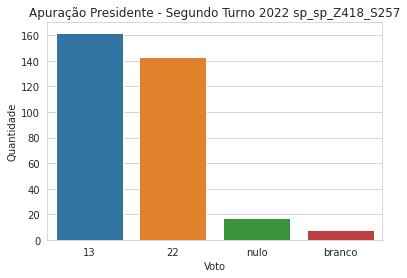

In [15]:
# Declaração de variáveis e atribuição dos nomes das colunas da tabela extraida e agrupada contida
# na variável vote_table_agg
x_column = 'voto'
y_column = 'quantidade'

# Declaração de variáveis e atribuição de valores, sendo o título do gráfico e etiquetas dos eixos
# x e y
title = f'Apuração Presidente - Segundo Turno 2022 {URNA}'
x_label = "Voto"
y_label = 'Quantidade'

# Definição do estilo do gráfico
with sns.axes_style('whitegrid'):
    # Declaração de variável e atribuição do objeto retornado do método .barplot(args)
    chart = sns.barplot(data=votes_table_agg, x = x_column, y = y_column)
    # Evocação do método .set(args), que fará a plotagem do gráfico
    chart.set(title = title, xlabel = x_label, ylabel = y_label);


- Visualização da quantidade de votos relativos:

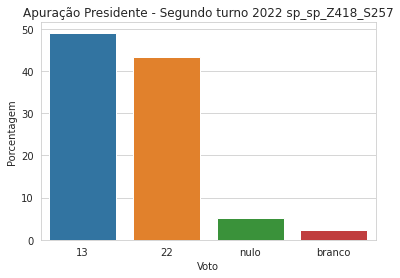

In [16]:
# Modificações nas variáveis de configuração para usar a porcentagem como parâmetro de análise
# Declaração de variáveis e atribuição dos nomes das colunas da tabela extraida e agrupada contida
# na variável vote_table_agg
x_column = 'voto'
y_column = 'quantidade_pct'

# Declaração de variáveis e atribuição de valores, sendo o título do gráfico e etiquetas dos eixos
# x e y
title = f'Apuração Presidente - Segundo turno 2022 {URNA}'
x_label = 'Voto'
y_label = 'Porcentagem'

# Definição do estilo do gráfico
with sns.axes_style('whitegrid'):
    # Declaração de variável e atribuição do objeto retornado do método .barplot(args)
    chart = sns.barplot(data=votes_table_agg, x = x_column, y = y_column)
    # Evocação do método .set(args), que fará a plotagem do gráfico
    chart.set(title = title, xlabel = x_label, ylabel = y_label);


# **Aula 5: Divulgação**

## Kaggle:
É uma comunicade de ciência de dados e aprendizado de máquina, permitindo que usuários encontrem e publiquem conjunto de dados, construam e compartilhem notebooks (Colab) e participem de competições.